# Notebook description
<!---define operatorname var-->
$\DeclareMathOperator{\Var}{Var}$
<!---define operatorname var-->

This notebook looks at the signal to noise ratio (SNR) of a synapse with Poisson input spike train with frequency $\lambda$. [Here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_periodic.ipynb) is a notebook considering a synapse with periodic input spikes and [here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_SNR_periodic_p_thinned.ipynb) is a notebook considering a synapse with $p$-thinned periodic input spikes

$$SNR = \frac{E[X]}{\sqrt{\operatorname{Var}(X)}}$$

at the steady state where $X$ is a random variable describing the state of the synapse.

The synapse is a first order lowpass filter described by
$$\tau\dot{x}=-x+\sum_i\delta(t-t_i)$$

where $\tau$ is the synaptic time constant and $t_i$ describes the arrival time of the $i$th spike. [Here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/synapse/synapse_demo.ipynb) is a notebook demoing a synapse. Since the input spikes are Poisson, the inter-arrival time (a.k.a. inter-spike time (ISI)) is distributed exponentially.

Our approach is to consider $X$ at an arbitrary point in time. The $i$th spike that arrived prior to this point in time contributes 

$$\frac{1}{\tau}e^{-t_i/\tau}$$

to the synapse's current state. Note that $t_i$ is now the time since the arrival of the $i$th spike. The value of the synapse is then

$$x=\sum_{i=1}^{\infty} \frac{1}{\tau}e^{-t_i/\tau}.$$

To deal with the $\infty$, we will first consider another random variable $Y$ that only looks back $T$ back in time such that 

$$y=\sum_{i=1}^{N} \frac{1}{\tau}e^{-t_i/\tau}.$$

where $N$ is a random variable representing the number of spikes received within $T$ of the present time.

From here 

$$
x = \lim_{T\rightarrow\infty}y
$$

# Summary of results

<div style="display:block; border: 1px solid black; padding: 15px;background-color: #EEEEFF;margin: 10px">
\begin{align*}
E[X] &= \lambda \\
\operatorname{Var}(X) &= \frac{\lambda}{2\tau} \\
SNR &= \sqrt{2\lambda\tau} \\
\end{align*}
</div>

# Derivations

Here we derive the expected value, variance, and SNR using Campbell's theorem. The [Appendix](#Appendix) contains derivations that do not use Campbell's theorem. [Campbell's theorem](https://en.wikipedia.org/wiki/Campbell%27s_theorem_%28probability%29) provides us with a method of finding the expectation of the random sum 

$$
\Sigma = \sum_{x\in N}f(x)
$$

where $N$ is a point process on $d$-dimensional Euclidian space $\mathbb{R}^d$ and $f:\mathbb{R}^d\rightarrow\mathbb{R}$ is a measurable function.

The random sum is [absolutely convergent](https://en.wikipedia.org/wiki/Absolute_convergence) with [probability one](https://en.wikipedia.org/wiki/Almost_surely) iff 

$$
\int_{\mathbb{R}^d}\min(|f(x)|,1)\Lambda(dx)<\infty
$$

If the integral is finite, then for any complex value $\theta$,

$$
E[e^{\theta\Sigma}]=\exp\left(\int_{\mathbb{R}^d}[e^{\theta f(x)}-1]\Lambda(dx)\right)
$$

so

$$
E(\Sigma)=\int_{\mathbb{R}^d}f(x)\Lambda(dx)
$$

and

$$
\Var(\Sigma)=\int_{\mathbb{R}^d}f(x)^2\Lambda(dx)
$$

Here, 
 - $d=1$ because we are only looking at time.
 - $\Lambda(dx)=\lambda dx$ because we're using a homogeneous Poisson process so the rate is assumed constant.
 - $f(x)=\frac{1}{\tau}e^{-x/\tau}u(x)$ is absolutely integrable.


Therefore,

\begin{align*}
E(\Sigma) &= \int_0^{\infty}\lambda\frac{1}{\tau}e^{-t/\tau}dt \\
 &= \lambda
\end{align*}

and

\begin{align*}
\Var(\Sigma) &= \int_0^{\infty}\lambda\left(\frac{1}{\tau}e^{-t/\tau}\right)^2dt \\
 &= \frac{\lambda}{\tau}\int_0^{\infty}\frac{1}{\tau}e^{-2t/\tau}dt \\
 &= \frac{\lambda}{2\tau} \\ 
\end{align*}

## Synapse SNR

\begin{align*}
SNR &= \frac{E[\Sigma]}{\sqrt{\Var(\Sigma)}} \\
 &= \frac{\lambda}{\sqrt{\lambda/2\tau}} \\
 &= \sqrt{2\lambda\tau}
\end{align*}

# Theoretical plots

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

s = np.random.seed(2)
rng = np.random.RandomState(s)

In [2]:
#theory functions
def th_mean(lam):
    return lam

def th_mean_sq(lam, tau):
    return lam/(2.*tau) + lam**2

def th_var(lam, tau):
    return lam/(2.*tau)

def th_snr(lam, tau):
    return np.sqrt(2*lam*tau)

# simulation functions
def spike_value(t, tau):
    return 1./tau*np.exp(-t/tau)

def get_snr(mu, var):
    return mu/np.sqrt(var)

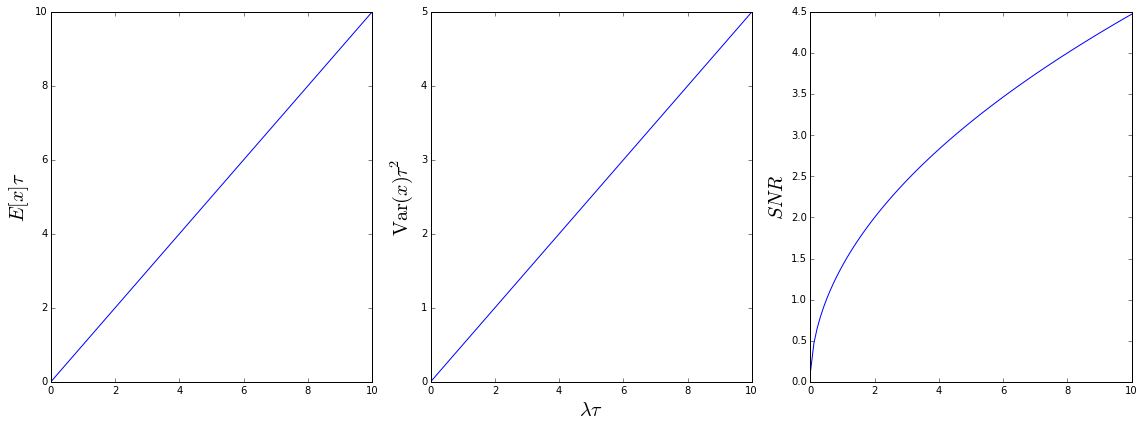

In [3]:
tau = .01
lam = np.linspace(1,1000,100)
e_x = th_mean(lam)
var_x = th_var(lam, tau)
snr_x = th_snr(lam, tau)

fig = plt.figure(figsize=(16,6))
plt.subplot(131)
plt.plot(lam*tau, e_x*tau, 'b')
plt.ylabel(r'$E[x]\tau$', fontsize=20)
plt.subplot(132)
plt.plot(lam*tau, var_x*tau**2, 'b')
plt.xlabel(r'$\lambda\tau$', fontsize=20);
plt.ylabel(r'$\operatorname{Var}(x)\tau^2$', fontsize=20)
plt.subplot(133)
plt.plot(lam*tau, snr_x, 'b')
plt.ylabel(r'$SNR$', fontsize=20)
plt.tight_layout()

# Fixed rate simulations

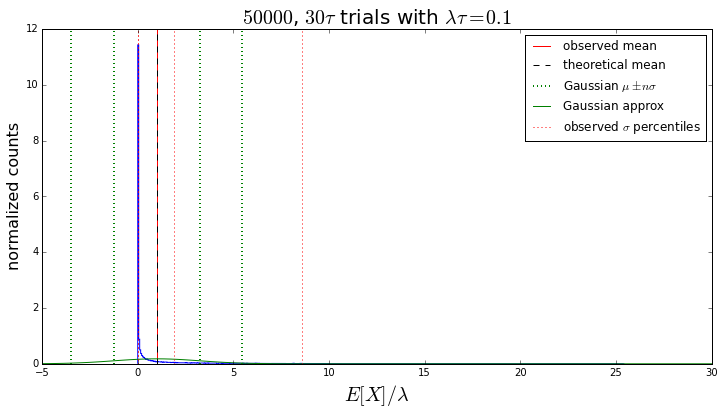

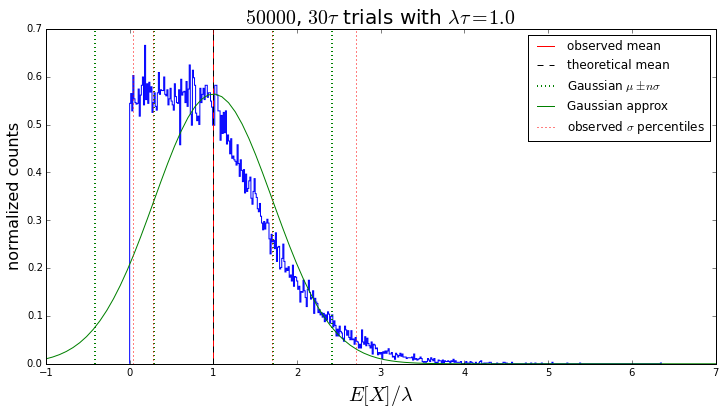

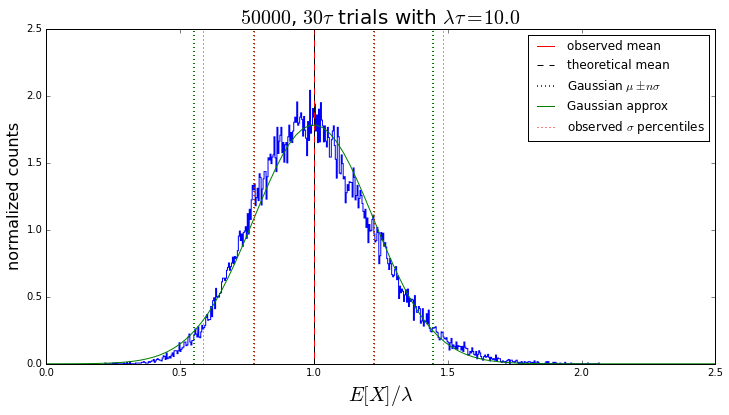

In [4]:
def sim_distribution(k=30., tau=.01, lam=1000., trials=4000):
    # k number of time constants to consider
    # tau time constant of the filter
    # lam frequency of spikes in
    nspikes = k*tau*lam

    isi = rng.exponential(1./lam, (trials, nspikes))
    spike_times = np.cumsum(isi, axis=1)
    spike_vals = spike_value(spike_times, tau)
    Xs = np.sum(spike_vals, axis=1)

    fig=plt.figure(figsize=(12,6))
    ax=fig.add_subplot(111)
    ret=ax.hist(Xs/lam, bins=max(10, trials/100), normed=True, histtype='step')

    mean_obs = np.mean(Xs)
    mean_th = th_mean(lam)
    plt.axvline(mean_obs/lam, color='r', label='observed mean')
    plt.axvline(mean_th/lam, color='k', linestyle='--', label='theoretical mean')

    var_obs = np.var(Xs)
    var_th = th_var(lam, tau)
    std_th = np.sqrt(var_th)

    for n in [1.,2.]:
        line = plt.axvline((mean_th+n*std_th)/lam, color='g', linestyle=':', linewidth=2)
        line = plt.axvline((mean_th-n*std_th)/lam, color='g', linestyle=':', linewidth=2)
    a, astep = np.linspace(plt.xlim()[0], plt.xlim()[1], 100, retstep=True)
    def normal_pdf(x, mu=0., sigma=1.):
        return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
    normal_approx = normal_pdf(a, mean_th/lam, std_th/lam)
    plt.plot(a, normal_approx, 'g', label='Gaussian approx')
    line.set_label(r'Gaussian $\mu \pm n\sigma$')

    from scipy.special import erf
    def normal_cdf(x, mu=0., sigma=1.):
        return 1./2.*(1+erf((x-mu)/(sigma*np.sqrt(2))))
    for n in [1.,2.]:
        percentiles = [normal_cdf(-n)*100., normal_cdf(n)*100.]
        pct_obs = np.percentile(Xs, percentiles)
        line = plt.axvline(pct_obs[0]/lam, color='r', linestyle=':')
        line = plt.axvline(pct_obs[1]/lam, color='r', linestyle=':')
    line.set_label(r'observed $\sigma$ percentiles')

    ax.set_title(r'$%d$, $%d\tau$ trials with $\lambda\tau=%.1f$' % (trials, k, lam*tau), fontsize=20)
    ax.set_ylabel('normalized counts', fontsize=16)
    ax.set_xlabel(r'$E[X]/\lambda$', fontsize=20)
    ax.legend(loc='upper right');

sim_distribution(k=30., tau=.01, lam=10., trials=50000)
sim_distribution(k=30., tau=.01, lam=100., trials=50000)
sim_distribution(k=30., tau=.01, lam=1000., trials=50000)

# Variable rate simulations

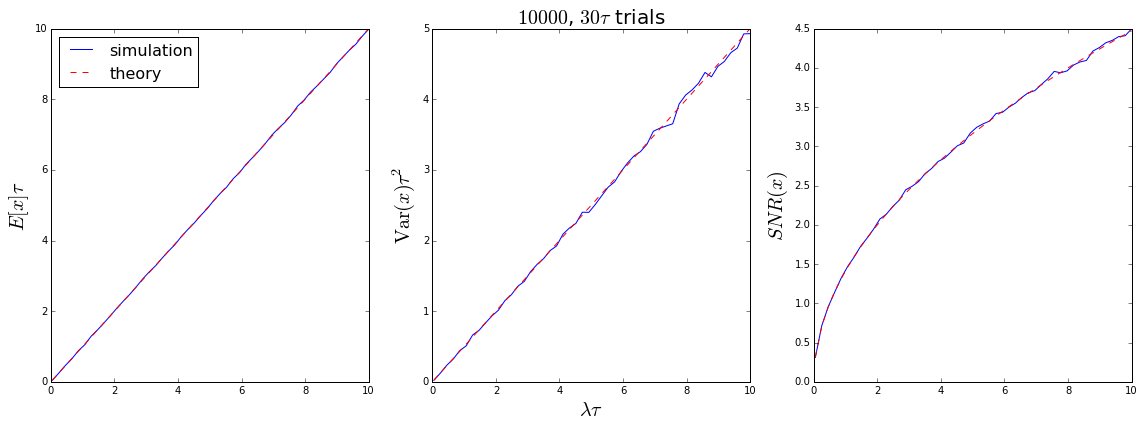

In [4]:
def check_theory(lams, k=30., tau=.01, trials=300):
    # lams array of frequencies to test
    # k number of time constants to consider in each experiment
    # tau time constant of the filter
    
    nfreqs = len(lams) # number of frequencies to test
    obs_mean = np.zeros(nfreqs)
    obs_var = np.zeros(nfreqs)
    obs_snr = np.zeros(nfreqs)
    for lam_idx, lam in enumerate(lams):
        nspikes = k*tau*lam
        isi = rng.exponential(1./lam, (trials, nspikes))
        spike_times = np.cumsum(isi, axis=1)
        spike_vals = spike_value(spike_times, tau)
        exp_state = np.sum(spike_vals, axis=1)
        obs_mean[lam_idx] = np.mean(exp_state)
        obs_var[lam_idx] = np.var(exp_state)
        obs_snr[lam_idx] = get_snr(obs_mean[lam_idx], obs_var[lam_idx])

    mean_th = th_mean(lams)
    var_th = th_var(lams, tau)
    snr_th = th_snr(lams, tau)

    plt.figure(figsize=(16,6))
    plt.subplot(131)
    plt.plot(lams*tau, obs_mean*tau, 'b', label='simulation')
    plt.plot(lams*tau, mean_th*tau, 'r--', label='theory')
    plt.ylabel(r'$E[x]\tau$', fontsize=20)
    plt.legend(loc='upper left', fontsize=16)
    plt.subplot(132)
    plt.plot(lams*tau, obs_var*tau**2, 'b')
    plt.plot(lams*tau, var_th*tau**2, 'r--')
    plt.xlabel(r'$\lambda\tau$', fontsize=20)
    plt.ylabel(r'$\operatorname{Var}(x)\tau^2$', fontsize=20)
    plt.title(r'$%d$, $%d\tau$ trials' % (trials, k), fontsize=20)
    plt.subplot(133)
    plt.plot(lams*tau, obs_snr, 'b')
    plt.plot(lams*tau, snr_th, 'r--')
    plt.ylabel(r'$SNR(x)$', fontsize=20)
    plt.tight_layout()
    
lams = np.linspace(5, 1000, 50)
check_theory(lams, k=30, trials=10000)

# Appendix

Here, we derive the mean and variance the hard way, without Campbell's theorem.

## Synapse mean

\begin{aligned}
E[Y] &= E\left[\sum_{i=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\right] \\
 &= E\left[E\left[\sum_{i=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\bigg|N\right]\right]\qquad\text{law of total expectation} \\
 &= E\left[\sum_{i=1}^{N}E\left[\frac{1}{\tau}e^{-t_i/\tau}\bigg|N\right]\right] \\
 &= E\left[\sum_{i=1}^{N}E\left[\frac{1}{\tau}e^{-t_i/\tau}\right]\right] \\
 &= E\left[\sum_{i=1}^{N}1\right]E\left[\frac{1}{\tau}e^{-t_i/\tau}\right] \\
 &= E[N]E\left[\frac{1}{\tau}e^{-t_i/\tau}\right] \\
\end{aligned}

Since the impulse response is a decaying exponential, it never reaches 0. To avoid having to then consider all spikes since the beginning of time,  we make the simplifying assumption that the impulse response is negligible after a certain time. That is, we only consider spikes within $T$ of the current time. The higher $T$ is, the further back in time we consider. As $N$ is the number of spikes from a Poisson spike train with rate $\lambda$ received within $T$, $E[N]=\lambda T$. In addition, spike times within a time period are uniform for a Poisson spike train, so $t_i$ is uniform and

\begin{aligned}
E\left[\frac{1}{\tau}e^{-t_i/\tau}\right] &= \int_0^{T}\frac{1}{T}\frac{1}{\tau}e^{-t_i/\tau}dt_i \\
 &= \frac{1}{T}\int_0^{T}\frac{1}{\tau}e^{-t_i/\tau}dt_i \\
 &= \frac{1}{T}\left(1-e^{-T/\tau}\right) \\
\end{aligned}

Therefore 

\begin{aligned}
E[Y] &= E[N] E\left[\frac{1}{\tau}e^{-t_i/\tau}\right] \\
 &= \lambda T \frac{1}{T}\left(1-e^{-T/\tau}\right) \\
 &= \lambda \left(1-e^{-T/\tau}\right)
\end{aligned}

Taking the limit as $T$ tends to infinity yields

\begin{aligned}
E[X] &= \lim_{T\rightarrow\infty}E[Y] \\
 &= \lim_{T\rightarrow\infty}\lambda \left(1-e^{-T/\tau}\right) \\
E[X] &=\lambda
\end{aligned}

as would be expected.

## Syanpse variance

By definition, 

$$\Var(X) = E[X^2] - E[X]^2$$

We've determined $E[X]$ already, so let's find $E[X^2]$.

\begin{aligned}
E[Y^2] &= E\left[\left(\sum_{i=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\right)^2\right] \\
 &= E\left[\left(\sum_{i=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\right)\left(\sum_{j=1}^{N}\frac{1}{\tau}e^{-t_j/\tau}\right)\right] \\
 &= E\left[\frac{1}{\tau^2}\left(e^{-t_1/\tau}+e^{-t_2/\tau}+\ldots+e^{-t_N/\tau}\right)
  \left(e^{-t_1/\tau}+e^{-t_2/\tau}+\ldots+e^{-t_N/\tau}\right)\right] \\
 &= E\left[\frac{1}{\tau^2}\left(\overbrace{\sum_{i=1}^{N}e^{-2t_i/\tau}}^{\text{squared terms}} + 
  \overbrace{\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}e^{-t_i/\tau}e^{-t_j/\tau}}^{\text{cross terms}}\right)\right] \\
 &= E\left[\frac{1}{\tau}\sum_{i=1}^{N}\frac{1}{\tau}e^{-2t_i/\tau}+
  \sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] \\
 &= E\left[\frac{1}{\tau}\sum_{i=0}^{N}\frac{1}{\tau}e^{-2t_i/\tau}\right]+
  E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] \\
\end{aligned}

First, let's consider the squared terms. This is very similar to the derivation for $E[Y]$

\begin{aligned}
E\left[\frac{1}{\tau}\sum_{i=1}^{N}\frac{1}{\tau}e^{-2t_i/\tau}\right] &= 
 \frac{1}{\tau}E\left[\sum_{i=1}^{N}\frac{1}{\tau}e^{-2t_i/\tau}\right] \\
 &= \frac{1}{\tau}E\left[E\left[\sum_{i=1}^{N}\frac{1}{\tau}e^{-2t_i/\tau}\bigg|N\right]\right] \\
 &= \frac{1}{\tau}E[N]E\left[\frac{1}{\tau}e^{-2t_i/\tau}\right] \\
 &= \frac{1}{\tau}(\lambda T)\int_0^{T}\frac{1}{T}\frac{1}{\tau}e^{-2t_i/\tau}dt_i \\
 &= \frac{\lambda}{\tau}\int_0^{T}\frac{1}{\tau}e^{-2t_i/\tau}dt_i \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2T/\tau}\right) \\
\end{aligned}

Now let's consider the consider the cross terms.

\begin{aligned}
E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] &=
   E\left[E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\bigg|N\right]\right] \\
  &= E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}E\left[\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\bigg|N\right]\right] \\
  &= E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}E\left[\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right]\right] \\
  &= E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}1\right]E\left[\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] \\
  &= E\left[N^2-N\right]E\left[\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] \\
  &= \left(E\left[N^2\right]-E[N]\right)E\left[\frac{1}{\tau}e^{-t_i/\tau}\right]E\left[\frac{1}{\tau}e^{-t_j/\tau}\right]
   \quad i\neq j \ \text{ so } t_i, t_j \text{ are independent} \\
  &= \left(E\left[N^2\right]-E[N]\right)\frac{1}{T}\left(1-e^{-T/\tau}\right)\frac{1}{T}\left(1-e^{-T/\tau}\right) \\
  &= \left(E\left[N^2\right]-E[N]\right)\frac{1}{T^2}\left(1-e^{-T/\tau}\right)^2 \\
\end{aligned}

For Poisson random variable $N$ with parameter $\lambda T$, $\operatorname{Var}(N)=E[N]=\lambda T$

\begin{aligned}
\lambda T &= E\left[N^2\right]-E[N]^2 \\
 &= E\left[N^2\right] - (\lambda T)^2 \\
E\left[N^2\right] &= \lambda T + (\lambda T)^2 
\end{aligned}

Returning to the Expected cross term derivation

\begin{aligned}
E\left[\sum_{i=1,i\neq j}^{N}\sum_{j=1}^{N}\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] &=
    \left(E\left[N^2\right]-E[N]\right)\frac{1}{T^2}\left(1-e^{-T/\tau}\right)^2 \\
 &= \left(\lambda T + (\lambda T)^2 - \lambda T\right)\frac{1}{T^2}\left(1-e^{-T/\tau}\right)^2 \\
 &= \left(\lambda T\right)^2\frac{1}{T^2}\left(1-e^{-T/\tau}\right)^2 \\
 &= \lambda^2\left(1-e^{-T/\tau}\right)^2 \\
\end{aligned}

Putting the Expectation of the squared terms with the Expectation of the cross terms,

\begin{aligned}
E\left[Y^2\right] &= E\left[\frac{1}{\tau}\sum_{i=0}^{N-1}\frac{1}{\tau}e^{-2t_i/\tau}\right] +
    E\left[\sum_{i=0,i\neq j}^{N-1}\sum_{j=0}^{N-1}\frac{1}{\tau}e^{-t_i/\tau}\frac{1}{\tau}e^{-t_j/\tau}\right] \\
 &= \frac{\lambda}{2\tau}\left(1-e^{-2T/\tau}\right) + \lambda^2\left(1-e^{-T/\tau}\right)^2
\end{aligned}

and relating to $E[X^2]$,

\begin{aligned}
E[X^2] &= \lim_{T\rightarrow\infty}E[Y^2] \\
 &= \lim_{T\rightarrow\infty} \frac{\lambda}{2\tau}\left(1-e^{-2T/\tau}\right)+
     \lambda^2\left(1-e^{-T/\tau}\right)^2 \\
E[X^2] &= \frac{\lambda}{2\tau} + \lambda^2
\end{aligned}

Plugging into the variance equation,

\begin{aligned}
\operatorname{Var}(X) &= E[X^2] - E[X]^2 \\
 &= \frac{\lambda}{2\tau} + \lambda^2 - \lambda^2 \\
\operatorname{Var}(X) &= \frac{\lambda}{2\tau}
\end{aligned}